In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge


<Axes: >

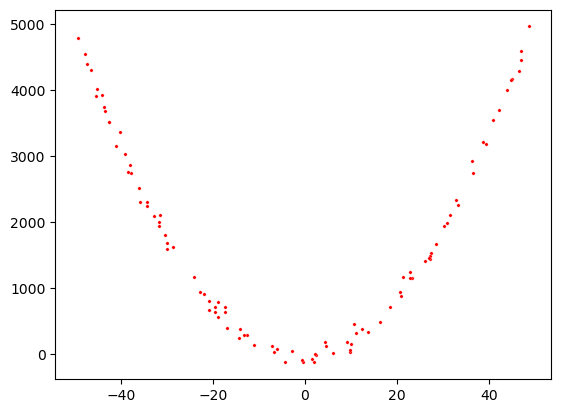

In [20]:
np.random.seed(42)

x=(np.random.rand(100)-0.5)*100

y=2*x**2+3*x+4+np.random.randn(100)*100

x=x.reshape(-1,1)
y=y.reshape(-1,1)

sns.scatterplot(x=x.flatten(), y=y.flatten(), color='red', s=6)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

poly=PolynomialFeatures(degree=2)
x_trans=poly.fit_transform(x_train)



model=LinearRegression()
model.fit(x_trans, y_train)

y_pred=model.predict(poly.transform(x_test))

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [[0.         2.65710303 2.0242144 ]]
Intercept: [-22.37418081]


<Axes: >

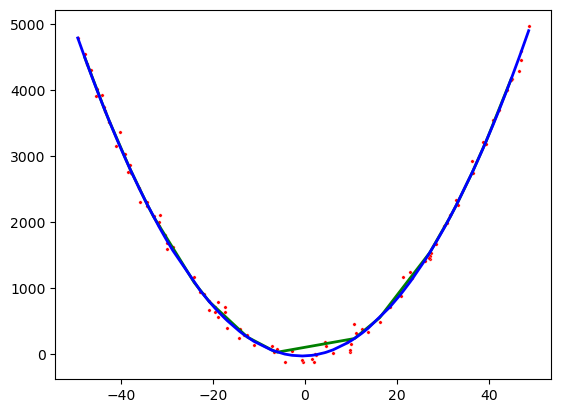

In [38]:
sns.scatterplot(x=x.flatten(), y=y.flatten(), color='red', s=6)
sns.lineplot(x=x_test.flatten(), y=y_pred.flatten(), color='green', linewidth=2)
sns.lineplot(x=x_train.flatten(), y=model.predict(poly.transform(x_train)).flatten(), color='blue', linewidth=2)

In [44]:
r2_for_poly=r2_score(y_test, y_pred)

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_trans, y_train)

y_pred_ridge=ridge.predict(poly.transform(x_test))

print('Ridge Coefficients:', ridge.coef_)
print('Ridge Intercept:', ridge.intercept_)


Ridge Coefficients: [[0.         2.65709907 2.02421439]]
Ridge Intercept: [-22.37417734]
0.9966111695089919


In [43]:
r2_for_ridge=r2_score(y_test, y_pred_ridge)

In [45]:
diff=r2_for_ridge-r2_for_poly
print('Difference in R2:', diff)

Difference in R2: 9.849178139731407e-10
